In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def graph_1():
    file_path = "Q1/Q1.npy"

    results = np.load(file_path, allow_pickle = True)
    
    mean = np.array([np.mean((np.sum(np.array(results), axis = 0)/5)[i*250:(i+1)*250]) for i in range(80)])
    var = np.array([np.var((np.sum(np.array(results), axis = 0)/5)[i*250:(i+1)*250]) for i in range(80)])
    
    plt.plot(np.arange(80),mean)
    plt.fill_between(np.arange(80), mean-var/2, mean+var/2, alpha = 0.2)
    plt.title("Average reward over time with Q-Learning (0.2) versus Optimal Player(0.5). Variance confidence interval")
    plt.xlabel("Batch of 250 games")
    plt.ylabel("Average reward")
    
    plt.rcParams["figure.figsize"] = (20,12)

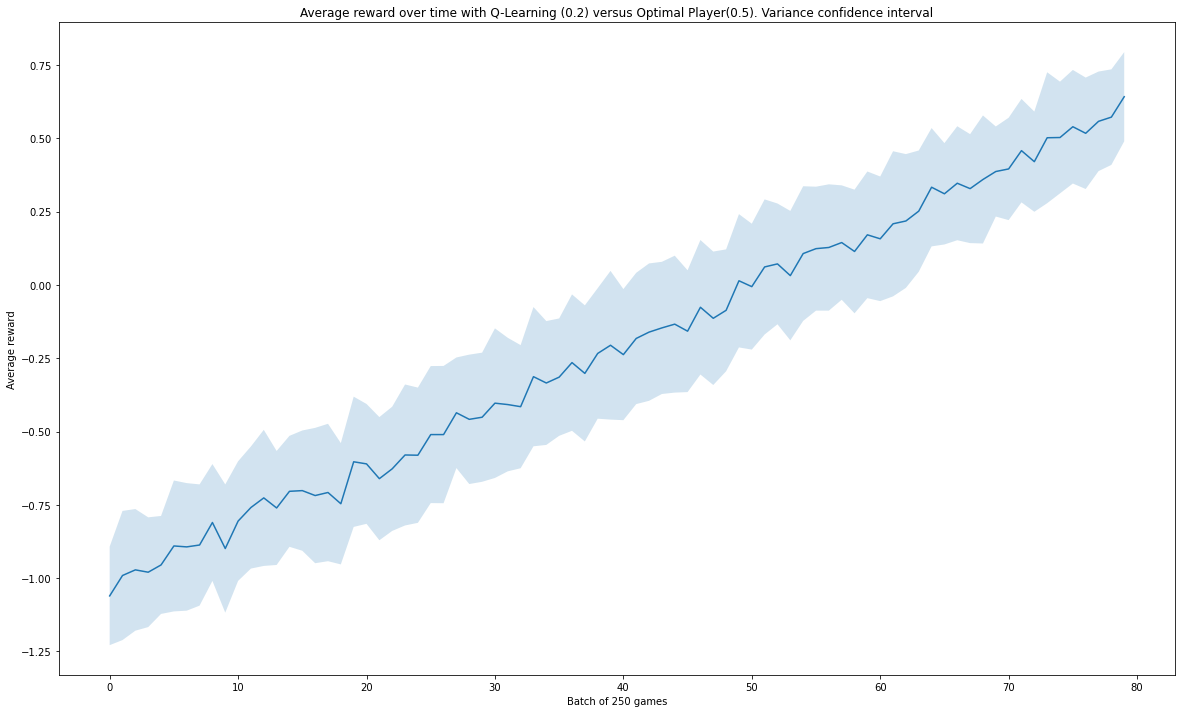

In [10]:
graph_1()

In [47]:
def graph_2():
    
    palette = plt.get_cmap('Blues')
    plt.title("Average reward over time with Q-Learning for various n* versus Optimal Player(0.5)")
    n_list = [1,1000,5000,10000,15000,20000,25000,30000,40000]
    
    for j in range(len(n_list)):
        file_name = 'Q2_n' + str(n_list[j])
        file_path = 'Q2' + "/" + file_name + ".npy"
        
        results = np.load(file_path, allow_pickle = True)
        
        mean = np.array([np.mean((np.sum(np.array(results), axis = 0)/5)[i*250:(i+1)*250]) for i in range(80)])
        
        plt.plot(np.arange(80), mean, color=palette(j*30 + 80),
                 label='Avg Reward n*=' + f'{n_list[j]}')
        

        plt.xlabel("Batch of 250 games")
        plt.ylabel("Average reward")
        plt.rcParams["figure.figsize"] = (20,12)
        
        plt.legend(loc=4, ncol=2)
    plt.show()    

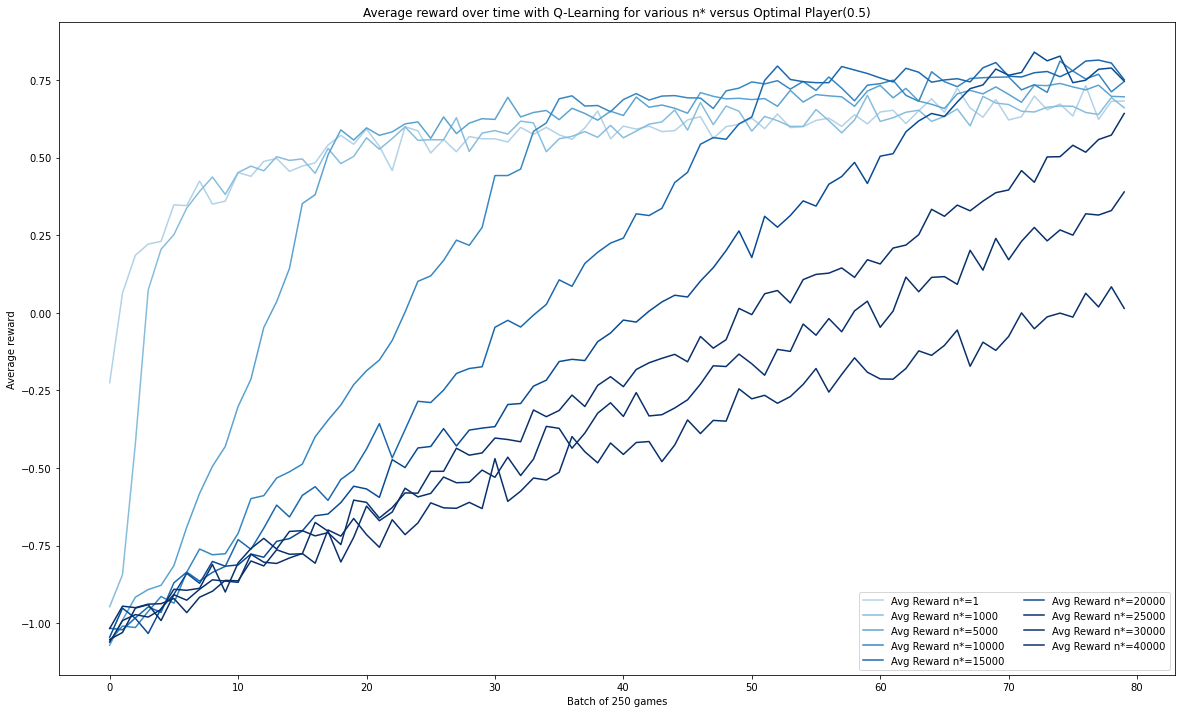

In [48]:
graph_2()

In [51]:
def graph(Q):
    value_str = var_dict[Q]
    value_print_str = var_print_dict[Q]
    value_list = val_list_dict[Q]
    
    M_list = ['rand','opt']
    even_dict = {'X': -1, 'O': 1, None: 0, '-': 0}
    odd_dict  = {'X': 1, 'O': -1, None: 0, '-': 0}

    M_rand = []
    M_opt = []
    M = [M_rand, M_opt]
    for m in range(2):
        for j in value_list:
            file_name = 'Q' + str(Q) + '_' + M_list[m] + '_' + value_str + str(j)
            file_path = 'Q' + str(Q) + "/" + file_name + ".npy"
            
#             print(file_path) ####RIMUOVERE QUANDO FUNZIONA TUTTO

            rewards = np.load(file_path, allow_pickle = True)
            rewards[:,:,::2]  = np.vectorize(even_dict.__getitem__)(rewards[:,:,::2])
            rewards[:,:,1::2] = np.vectorize(odd_dict.__getitem__)(rewards[:,:,1::2])

            M[m].append(rewards.mean(axis=2).mean(axis=0))
    
    palette_opt = plt.get_cmap('YlOrRd')
    palette_rand = plt.get_cmap('Blues')

    for i in range(len(M_opt)):
        plt.plot(np.arange(80), M_opt[i], color=palette_opt(i*30 + 50),
                 label='$M_{opt}$ ' + value_print_str + f'= {value_list[i]}')

    for i in range(len(M_rand)):
        plt.plot(np.arange(80), M_rand[i], color=palette_rand(i*30 + 50),
                 label='$M_{rand}$ ' + value_print_str + f'= {value_list[i]}')

    plt.legend(loc=4, ncol=2)

    plt.title(title_dict[Q], loc='left', fontsize=12, fontweight=0)
    plt.xlabel('Batch of 250 games')
    plt.ylabel('M')
    plt.rcParams["figure.figsize"] = (20,12)

    plt.show()


Q3/Q3_rand_n1.npy
Q3/Q3_rand_n1000.npy
Q3/Q3_rand_n5000.npy
Q3/Q3_rand_n10000.npy
Q3/Q3_opt_n1.npy
Q3/Q3_opt_n1000.npy
Q3/Q3_opt_n5000.npy
Q3/Q3_opt_n10000.npy


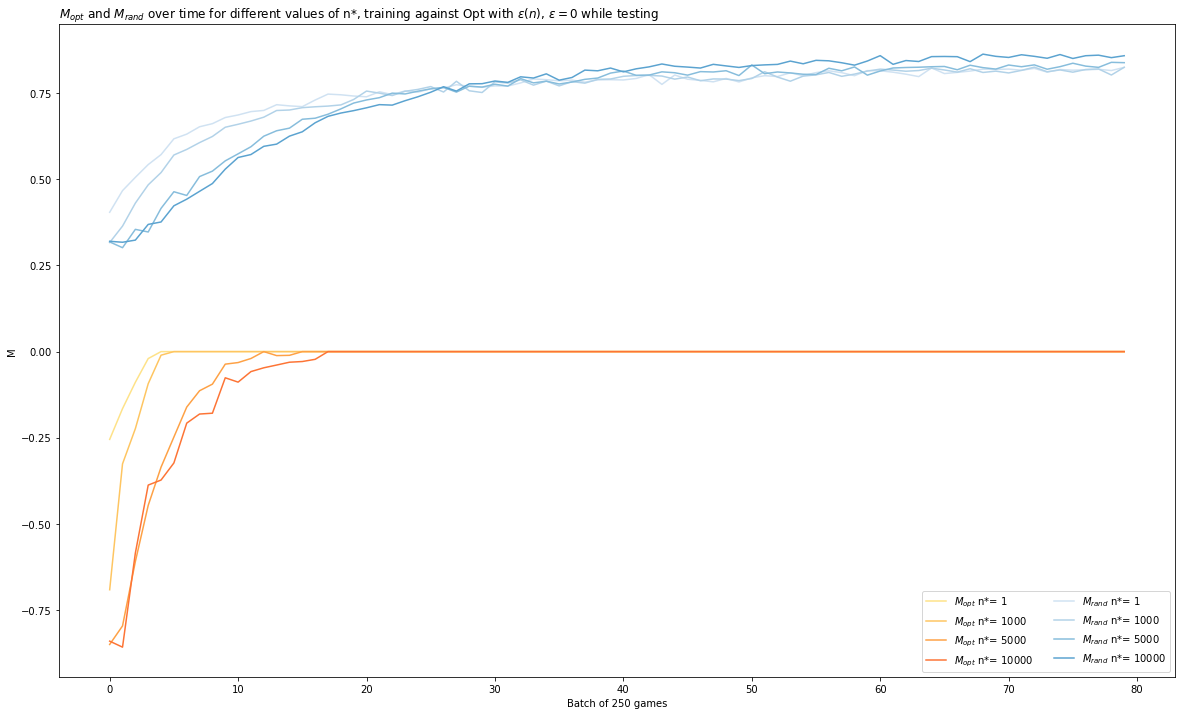

Q4/Q4_rand_e0.npy
Q4/Q4_rand_e0.1.npy
Q4/Q4_rand_e0.25.npy
Q4/Q4_rand_e0.5.npy
Q4/Q4_rand_e0.75.npy
Q4/Q4_rand_e1.npy
Q4/Q4_opt_e0.npy
Q4/Q4_opt_e0.1.npy
Q4/Q4_opt_e0.25.npy
Q4/Q4_opt_e0.5.npy
Q4/Q4_opt_e0.75.npy
Q4/Q4_opt_e1.npy


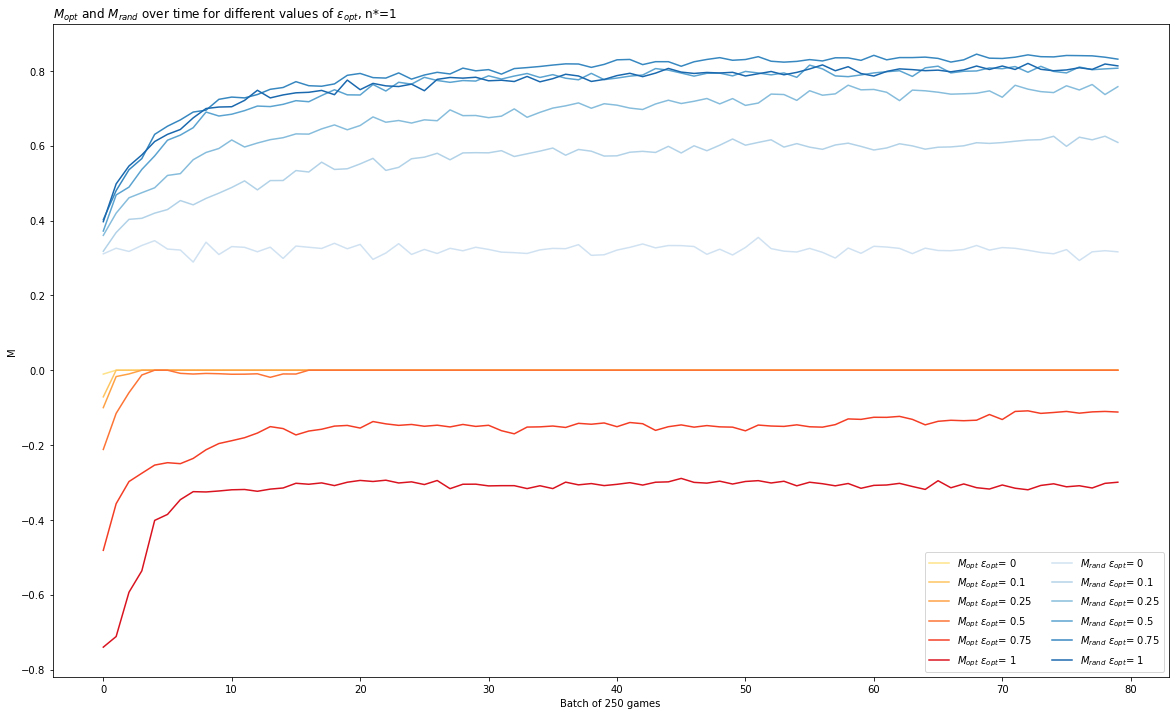

Q7/Q7_rand_e0.npy
Q7/Q7_rand_e0.1.npy
Q7/Q7_rand_e0.25.npy
Q7/Q7_rand_e0.5.npy
Q7/Q7_rand_e0.75.npy
Q7/Q7_rand_e0.9.npy
Q7/Q7_opt_e0.npy
Q7/Q7_opt_e0.1.npy
Q7/Q7_opt_e0.25.npy
Q7/Q7_opt_e0.5.npy
Q7/Q7_opt_e0.75.npy
Q7/Q7_opt_e0.9.npy


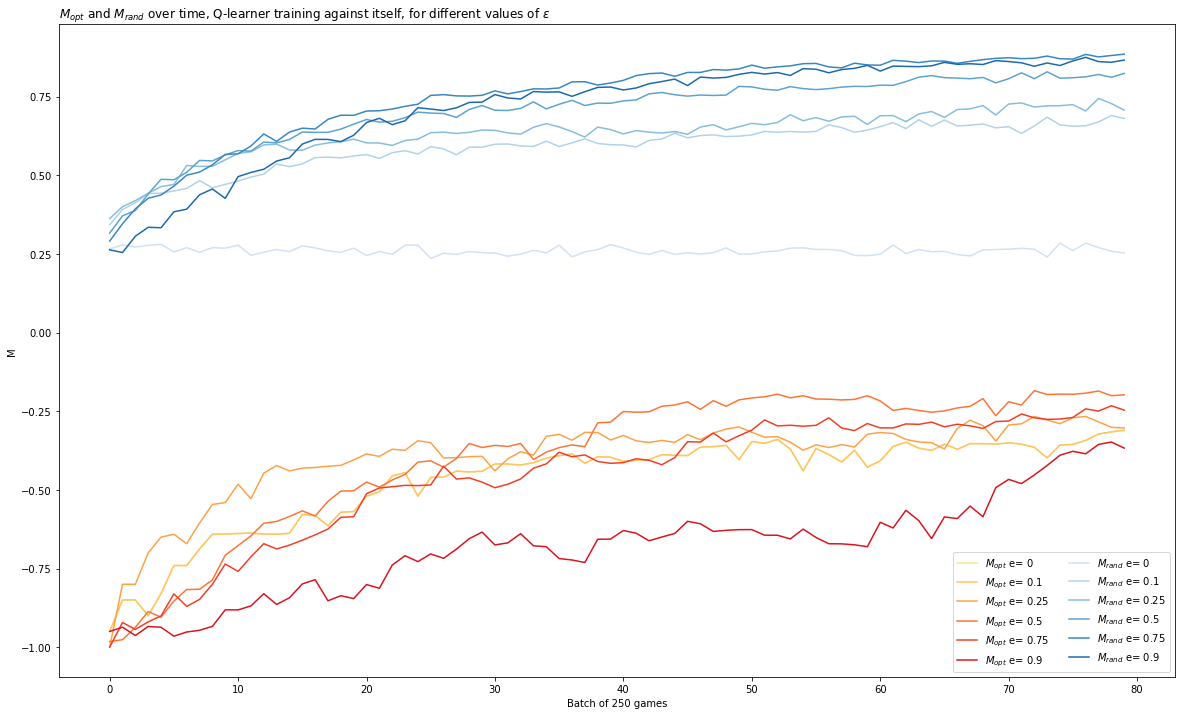

Q8/Q8_rand_n1.npy
Q8/Q8_rand_n1000.npy
Q8/Q8_rand_n5000.npy
Q8/Q8_rand_n10000.npy
Q8/Q8_opt_n1.npy
Q8/Q8_opt_n1000.npy
Q8/Q8_opt_n5000.npy
Q8/Q8_opt_n10000.npy


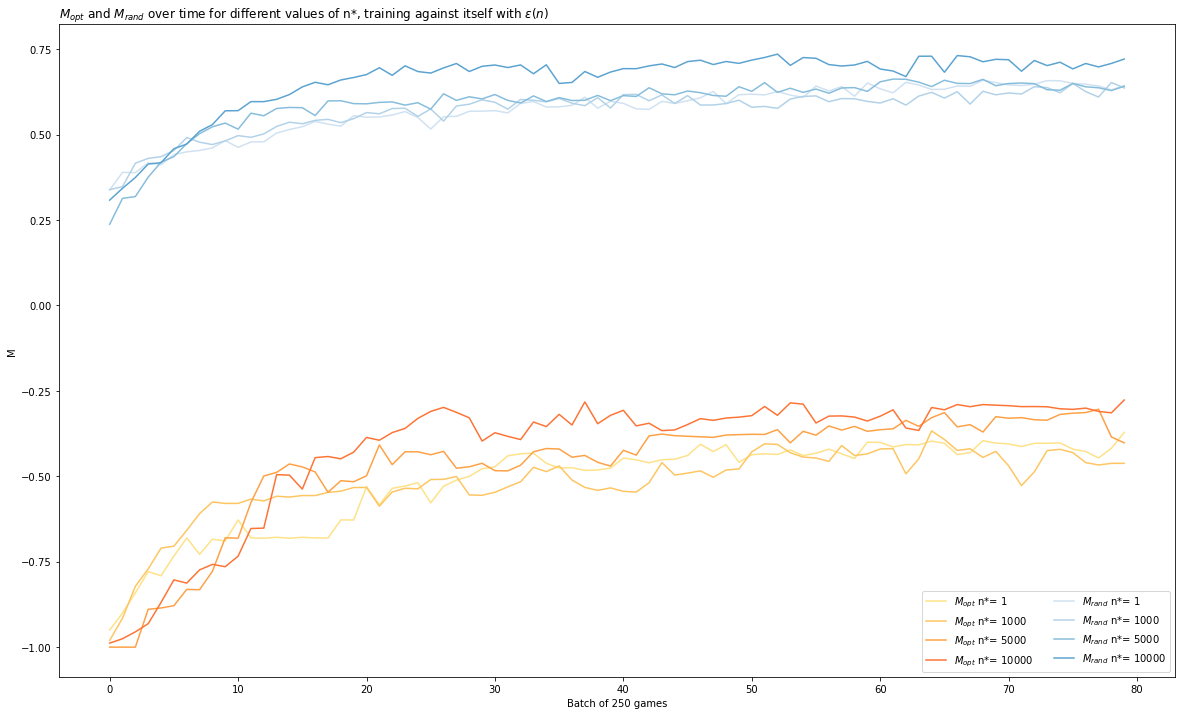

In [53]:
e_list = [0, 0.1, 0.25, 0.5, 0.75, 0.9]
e_list_1 = [0, 0.1, 0.25, 0.5, 0.75, 1]
n_list = [1,1000,5000,10000]

var_dict = {3: 'n', 4: 'e', 7: 'e', 8: 'n'}
var_print_dict = {3: 'n*', 4: '$\epsilon_{opt}$', 7: 'e', 8: 'n*'}
val_list_dict = {3: n_list, 4: e_list_1, 7: e_list, 8: n_list}

# xlabel_dict = {3: 'Batch of 250 games'}
# ylabel_dict = {3: 'M'}
# in case use ylabel_dict[Q] and xlabel_dict[Q] instead of fixed text for plt.x/ylabel

title_dict = {3: '$M_{opt}$ and $M_{rand}$ over time for different values of n*, training against Opt with $\epsilon(n)$, $\epsilon=0$ while testing',
             4: '$M_{opt}$ and $M_{rand}$ over time for different values of $\epsilon_{opt}$, n*=1', 
             7: '$M_{opt}$ and $M_{rand}$ over time, Q-learner training against itself, for different values of $\epsilon$',
             8: '$M_{opt}$ and $M_{rand}$ over time for different values of n*, training against itself with $\epsilon(n)$'}

for Q in [3,4, 7, 8]:
    graph(Q)

In [ ]:
rewards.shape